In [2]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import os

### Number of sample in each label

In [4]:
file_target = '../assets/data/'
for i,path in enumerate(os.listdir(file_target)):
    tmp = pd.read_csv(f'{file_target}{path}')
    if i == 0 :
        data = tmp
    else:
        data = pd.concat([data,tmp],axis=0)

In [6]:
data.reset_index(inplace=True,drop=True)

In [8]:
data.head()

,comment,rating_star,by,pred_label
0,Giày thể thao đẹp hợp giá tiền. Xăng đan size ...,5,ori,positive
1,"Hàng chất lượng tốt, rẻ hơn các shop khác. Có ...",4,giang,positive
2,"Sản phẩm không đẹp , không chắc chắn. Các khớp...",3,thang,negative
3,"giày rất đẹp, giao hàng siêu nhanh luôn, nhưng...",5,ori,positive
4,Shop giao đủ số lượng .mua nhiều lần rồi lần n...,5,ori,positive


In [9]:
data.dropna(inplace=True)

In [10]:
data.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='pred_label', ylabel='count'>

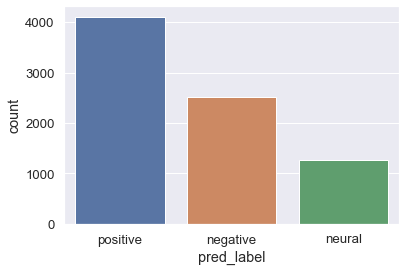

In [11]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(data.pred_label)

#### load stopwords

In [1]:
stopwords = []
with open('../assets/stopword/stopword.txt','r',encoding="utf8") as f:
    for word in f:
        stopwords.append(word.replace('\n',''))

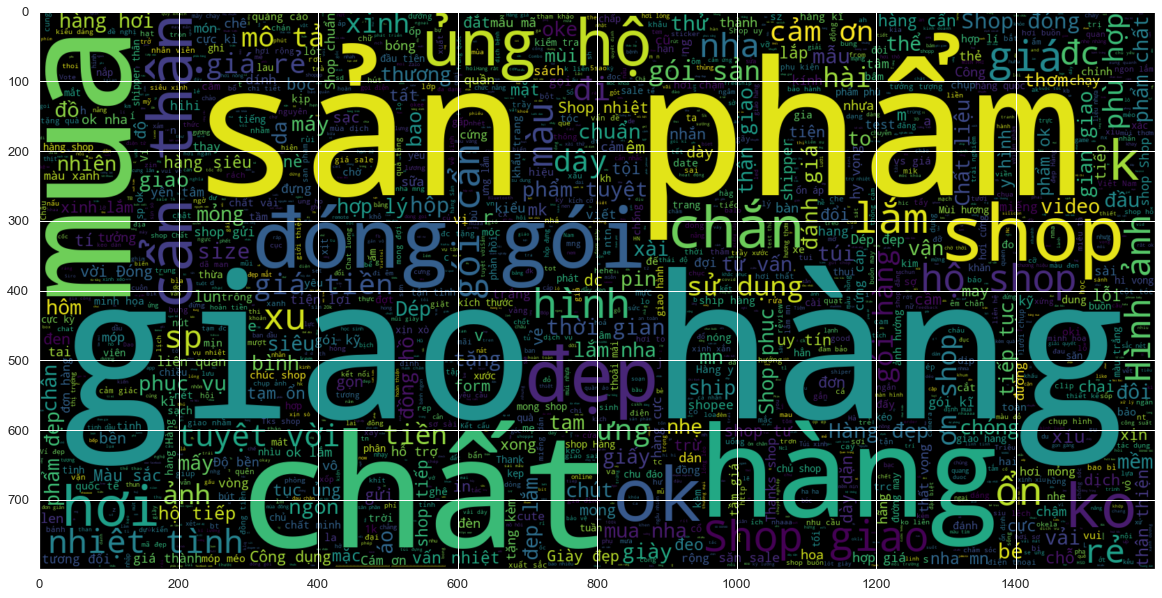

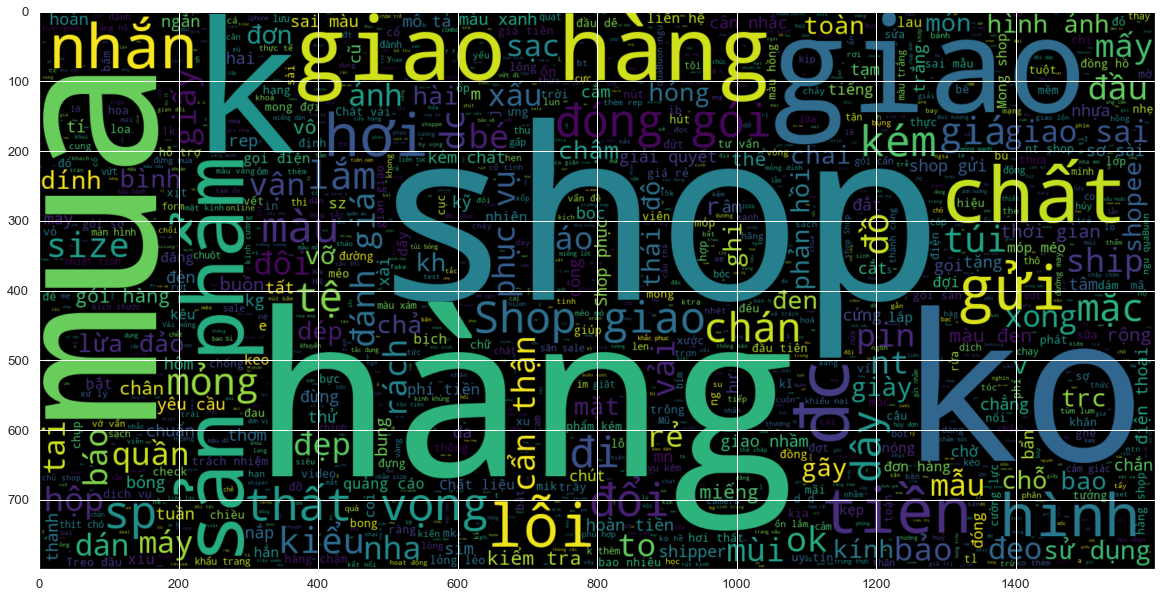

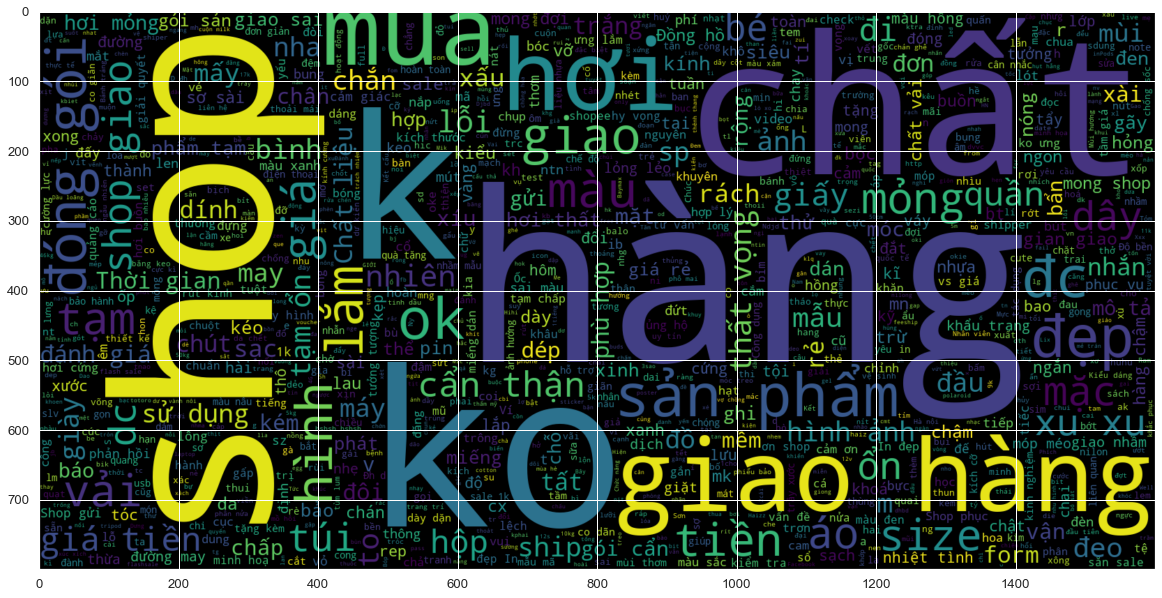

In [13]:
for label in data.pred_label.unique():
    plt.figure(figsize = (20,20)) # Positive Review Text
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,stopwords=stopwords).generate(" ".join(data[data.pred_label == label].comment))
    plt.imshow(wc , interpolation = 'bilinear')
    plt.savefig(f'img/{label}.png')

In [15]:
data

,comment,rating_star,by,pred_label
0,Giày thể thao đẹp hợp giá tiền. Xăng đan size ...,5,ori,positive
1,"Hàng chất lượng tốt, rẻ hơn các shop khác. Có ...",4,giang,positive
2,"Sản phẩm không đẹp , không chắc chắn. Các khớp...",3,thang,negative
3,"giày rất đẹp, giao hàng siêu nhanh luôn, nhưng...",5,ori,positive
4,Shop giao đủ số lượng .mua nhiều lần rồi lần n...,5,ori,positive
...,...,...,...,...
7896,Công dụng:hàng qúa tệ,2,khanh,negative
7897,Cục len hơi nhỏ so với mình nghĩ :))),4,thang,negative
7898,Sản phẩm như hình chất lượng ổn áp mua hồi sal...,3,giang,neural
7899,Shop này lừa đảo mọi ng ạ. Nó gửi hộp ko đến c...,1,ori,negative


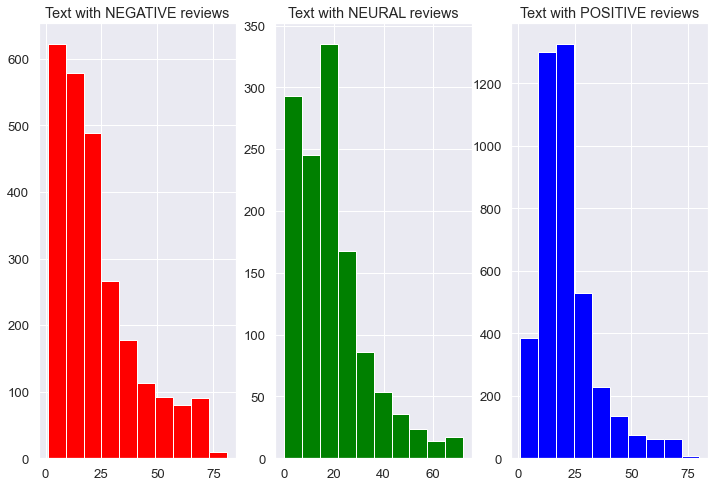

In [19]:
nb_class = len(data.pred_label.unique())
list_color = ['red','green','blue']
fig,ax=plt.subplots(1,nb_class,figsize=(12,8))
for i,label in enumerate(data.pred_label.unique()):
    text_len=data[data['pred_label']==label]['comment'].str.split().map(lambda x: len(x))
    ax[i-1].hist(text_len,color=list_color[i-1])
    ax[i-1].set_title(f'Text with {label.upper()} reviews')
plt.show()

In [20]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.comment)
corpus[:5]

['Giày', 'thể', 'thao', 'đẹp', 'hợp']

In [21]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'hàng': 3555,
 'shop': 2369,
 'giao': 2137,
 'mua': 1557,
 'có': 1523,
 'phẩm': 1432,
 'không': 1423,
 'thì': 1393,
 'nhưng': 1358,
 'nên': 1333}

In [22]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
def plotCommonWord(label,topn,ngram):
    dataset = data[data['pred_label'] == label]
    most_common_uni = get_top_text_ngrams(dataset.comment,topn,ngram)
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
                width=700, height=700,color='Common_words')
    fig.show()

In [28]:
plotCommonWord('positive',10,2)

In [31]:
plotCommonWord('negative',10,2)

In [33]:
plotCommonWord('neural',10,2)